# OLID Classification (structured like SMS Spam)

- TextBlob: [Preventing splitting at apostrophies when tokenizing words using nltk](https://stackoverflow.com/questions/34714162/preventing-splitting-at-apostrophies-when-tokenizing-words-using-nltk)
    - try `from nltk.tokenize import TweetTokenizer`

In [124]:
# Imports

import numpy as np
import pandas as pd
import csv
from tqdm import tqdm
from sklearn.utils import shuffle

import random
from textblob import TextBlob
from nltk.tokenize import TweetTokenizer

import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kcava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [125]:
from nltk.corpus import stopwords
stopword_list = stopwords.words("english")

In [126]:
print(type(stopwords.words("english")))
print(len(stopwords.words("english")))

<class 'list'>
179


In [127]:
class DataReader:
    def __init__(self, folder="../Dataset-OLID/OLIDv1.0/", 
                 task_a="data_subtask_a.csv"):
        self.folder = folder
        self.task_a = task_a
        
    def get_df_train_data(self):
        train_data = pd.read_csv(self.folder + self.task_a)
        train_tweets = train_data.drop(["Unnamed: 0", "id", "subtask_a"], axis=1)
        return train_tweets
    
    def get_df_data(self, file="data_subtask_a.csv"):
        data = pd.read_csv(self.folder + file)
        train_tweets = data.drop(["Unnamed: 0", "id", "subtask_a"], axis=1)
        return train_tweets
    
    def get_np_data_and_labels(self, file="data_subtask_a.csv"):
        tweets = self.get_df_data(file)
        data, labels = tweets.values[:,0], tweets.values[:,1]
        return data, labels
    
    # this creates copies
    def shuffle_np(self, data, labels):
        assert len(data) == len(labels)
        p = np.random.permutation(len(data))
        return data[p], labels[p]
        

In [128]:
dr = DataReader()
data, labels = dr.get_np_data_and_labels()
print(type(data))
print(type(data[0]))
print(data[0])
print("-"*50)
print(data[:10])

<class 'numpy.ndarray'>
<class 'str'>
@USER She should ask a few native Americans what their take on this is.
--------------------------------------------------
['@USER She should ask a few native Americans what their take on this is.'
 '@USER @USER Go home you’re drunk!!! @USER #MAGA #Trump2020 👊🇺🇸👊 URL'
 'Amazon is investigating Chinese employees who are selling internal data to third-party sellers looking for an edge in the competitive marketplace. URL #Amazon #MAGA #KAG #CHINA #TCOT'
 '@USER Someone should\'veTaken" this piece of shit to a volcano. 😂"'
 '@USER @USER Obama wanted liberals &amp; illegals to move into red states'
 '@USER Liberals are all Kookoo !!!' '@USER @USER Oh noes! Tough shit.'
 '@USER was literally just talking about this lol all mass shootings like that have been set ups. it’s propaganda used to divide us on major issues like gun control and terrorism'
 '@USER Buy more icecream!!!'
 '@USER Canada doesn’t need another CUCK! We already have enough #LooneyLeft #L

In [129]:
# No point in doing this, these words are already in :)


#from nltk.corpus import stopwords
#import re

#stop_custom = stopwords.words("english")

#print(stop_custom)

#stop_custom.append(".")
#stop_custom.append("!")
#stop_custom.append("'")

#for stopword in stop_custom:
#    if "'" in stopword:
#        print(stopword)
#        pre, post = stopword.split("'")
#        
#        print(pre, post)
#        if pre not in stop_custom: 
#            stop_custom.append(pre)
#            print("ADDED: ", pre)
#        if post not in stop_custom: 
#           stop_custom.append(post)
#            print("ADDED: ", post)

#print(stop_custom)


In [130]:
class Preprocessor:
    
    def remove_stopwords_and_punctuation(self, data, verbose = False):
        from nltk.corpus import stopwords
        import re

        stop = stopwords.words("english")
        stop.append("’")
        
        tknzr = TweetTokenizer()
        
        if verbose:
            print(type(stop))
            print(stop)
        noise = ["user"]
        for i in range(len(data)):
            if verbose:
                print(data[i])
            
            # Remove punctuation
            #sentence_blob = TextBlob(data[i])
            sentence_blob = tknzr.tokenize(data[i])
            #print("Blob: ", sentence_blob)
            sentence = " ".join(sentence_blob) #.words)
            #print(sentence)
            words = sentence.split()
            #words = data[i].split()
            
            #Remove stopwords
            if verbose:
                print(words)
            clean_words = []
            
            for word in words:
                word = word.strip().lower()
                if verbose:
                    print(word)
                if word not in stop: 
                    clean_words.append(word)
                else: 
                    if verbose:
                        print("Remove: ", word)
            
            data[i] = " ".join(clean_words)
            if verbose:
                print(data[i])
                print("-"*20)
        return data
    
    def remove_stopwords_and_punctuation_textblob(self, data, verbose = False):
        from nltk.corpus import stopwords
        import re

        stop = stopwords.words("english")
        stop.append("’")
        
        if verbose:
            print(type(stop))
            print(stop)
        noise = ["user"]
        for i in range(len(data)):
            if verbose:
                print(data[i])
            
            # Remove punctuation
            sentence_blob = TextBlob(data[i])
            sentence = " ".join(sentence_blob.words)
            #print(sentence)
            words = sentence.split()
            
            #Remove stopwords
            if verbose:
                print(words)
            clean_words = []
            
            for word in words:
                word = word.strip().lower()
                if verbose:
                    print(word)
                if word not in stop: 
                    clean_words.append(word)
                else: 
                    if verbose:
                        print("Remove: ", word)
            
            data[i] = " ".join(clean_words)
            if verbose:
                print(data[i])
                print("-"*20)
        return data


In [131]:
pp = Preprocessor()


In [132]:
data_no_stopwords = pp.remove_stopwords_and_punctuation(data[:10].copy(), 
                                                        verbose=False)
print(type(data_no_stopwords))
print(data_no_stopwords[:10])

<class 'numpy.ndarray'>
['@user ask native americans take .'
 '@user @user go home drunk ! ! ! @user #maga #trump2020 👊 🇺 🇸 👊 url'
 'amazon investigating chinese employees selling internal data third-party sellers looking edge competitive marketplace . url #amazon #maga #kag #china #tcot'
 '@user someone should\'vetaken " piece shit volcano . 😂 "'
 '@user @user obama wanted liberals & illegals move red states'
 '@user liberals kookoo ! ! !' '@user @user oh noes ! tough shit .'
 '@user literally talking lol mass shootings like set ups . propaganda used divide us major issues like gun control terrorism'
 '@user buy icecream ! ! !'
 '@user canada need another cuck ! already enough #looneyleft #liberals f * * king great country ! #qproofs #trudeaumustgo']


In [133]:
data_no_stopwords = pp.remove_stopwords_and_punctuation_textblob(data[:10].copy(), 
                                                        verbose=False)
print(type(data_no_stopwords))
print(data_no_stopwords[:10])

<class 'numpy.ndarray'>
['user ask native americans take'
 'user user go home drunk user maga trump2020 👊🇺🇸👊 url'
 'amazon investigating chinese employees selling internal data third-party sellers looking edge competitive marketplace url amazon maga kag china tcot'
 "user someone should'vetaken piece shit volcano 😂"
 'user user obama wanted liberals amp illegals move red states'
 'user liberals kookoo' 'user user oh noes tough shit'
 'user literally talking lol mass shootings like set ups propaganda used divide us major issues like gun control terrorism'
 'user buy icecream'
 'user canada need another cuck already enough looneyleft liberals f king great country qproofs trudeaumustgo']


#### Preprocess actual whole data

In [134]:
clean_tweets = pp.remove_stopwords_and_punctuation_textblob(data.copy(),
                                                            verbose=False)

In [135]:
print(type(clean_tweets), type(labels))
print(len(clean_tweets), len(labels))
print(clean_tweets[:10])
print(labels[:10])

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
13240 13240
['user ask native americans take'
 'user user go home drunk user maga trump2020 👊🇺🇸👊 url'
 'amazon investigating chinese employees selling internal data third-party sellers looking edge competitive marketplace url amazon maga kag china tcot'
 "user someone should'vetaken piece shit volcano 😂"
 'user user obama wanted liberals amp illegals move red states'
 'user liberals kookoo' 'user user oh noes tough shit'
 'user literally talking lol mass shootings like set ups propaganda used divide us major issues like gun control terrorism'
 'user buy icecream'
 'user canada need another cuck already enough looneyleft liberals f king great country qproofs trudeaumustgo']
[1 1 0 1 0 1 1 1 0 1]


In [136]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

VOCAB_SIZE = 2500
EMBEDDING_DIM = 16
MAX_LENGTH = 64
TRUNC_TYPE = "post"
PADDING_TYPE = "post"
OOV_TOK = "<OOV>"
TRAINING_PORTION = 0.8
NUM_EPOCHS = 20

def get_train_val(messages, labels):
    train_number = int(len(messages) * TRAINING_PORTION)

    train_msgs = messages[:train_number]
    train_labels = labels[:train_number]
    val_msgs = messages[train_number:]
    val_labels = labels[train_number:]

    tokenizer = Tokenizer(num_words = VOCAB_SIZE, oov_token = OOV_TOK)
    tokenizer.fit_on_texts(train_msgs)
    word_index = tokenizer.word_index

    print("len(msgs) = {}; len(labels) = {}".format(len(messages), len(labels)))
    print("TRAIN: len(x) = {}; len(y) = {}".format(len(train_msgs),len(train_labels)))
    print("TEST: len(x) = {}; len(y) = {}".format(len(val_msgs),len(val_labels)))


    print("\nlen(word_index) = {}\n".format(len(word_index))) 
    # Total number of words without stopwords = 8029
    #print(word_index)

    train_sequences = tokenizer.texts_to_sequences(train_msgs)
    train_padded = pad_sequences(train_sequences, maxlen = MAX_LENGTH, 
                                padding = PADDING_TYPE, truncating = TRUNC_TYPE)

    val_sequences = tokenizer.texts_to_sequences(val_msgs)
    val_padded = pad_sequences(val_sequences, maxlen = MAX_LENGTH, 
                                padding = PADDING_TYPE, truncating = TRUNC_TYPE)

    print(type(val_padded))

    #label_tokenizer = Tokenizer()
    #label_tokenizer.fit_on_texts(labels)

    #train_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
    #val_label_seq = np.array(label_tokenizer.texts_to_sequences(val_labels))
    
    return train_padded, train_labels, val_padded, val_labels



#    """
#        Set labels to be 0 for ham, 1 for spam
#        (was 1 for ham, 2 for spam before -> didn't work)
#    """
#    for i in range(len(train_label_seq)):
#        train_label_seq[i] -= 1
#
#    for i in range(len(val_label_seq)):
#        val_label_seq[i] -= 1


train_x, train_y, val_x, val_y = get_train_val(clean_tweets, labels)

len(msgs) = 13240; len(labels) = 13240
TRAIN: len(x) = 10592; len(y) = 10592
TEST: len(x) = 2648; len(y) = 2648

len(word_index) = 17740

<class 'numpy.ndarray'>


In [137]:
print("TRAIN: len(x) = {}; len(y) = {}".format(len(train_x),len(train_y)))
print("VAL: len(x) = {}; len(y) = {}".format(len(val_x),len(val_y)))
print()

print(train_x[0], "-> len = ", len(train_x[0]))

TRAIN: len(x) = 10592; len(y) = 10592
VAL: len(x) = 2648; len(y) = 2648

[   2  250 2117  187   50    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0] -> len =  64


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 64, 16)            40000     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 40,433
Trainable params: 40,433
Non-trainable params: 0
_________________________________________________________________
[[   2  250 2117 ...    0    0    0]
 [   2    2   25 ...    0    0    0]
 [   1    1 2118 ...    0    0    0]
 ...
 [   2  146    9 ...    0    0    0]
 [   2    1   18 ...    0    0    0]
 [   2 1505 1418 ...    0    0    0]]
<class 'numpy.ndarra

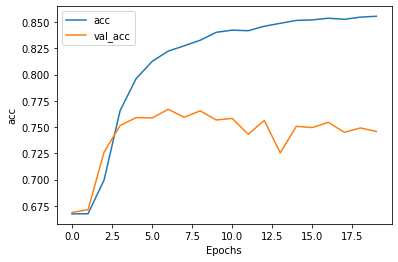

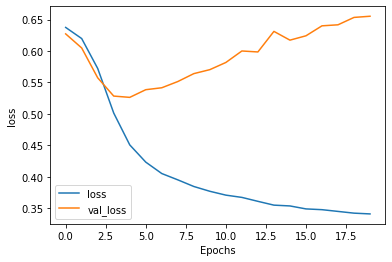

NameError: name 'word_index' is not defined

In [138]:
"""
    Define the model
"""

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["acc"])
model.summary()

#import pdb; pdb.set_trace()

print(train_x)
print(type(train_x))

history = model.fit(train_x, train_y,
         epochs=NUM_EPOCHS, validation_data=(val_x, val_y))

scores = model.evaluate(val_x, val_y)

print("\nSCORES:")
print(scores)


"""
    Save model to json
"""

# serialize model to json
model_json = model.to_json()
with open("model_sms_spam.json", "w") as json_file: 
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model_sms_spam.h5")
print("\n--> Saved model to disk.")

#"""
#    reset labels to be 1 for ham, 2 for spam
#    (was 1 for ham, 2 for spam before -> didn't work)
#"""
#for i in range(len(train_label_seq)):
#    train_label_seq[i] += 1

#for i in range(len(val_label_seq)):
#    val_label_seq[i] += 1

import matplotlib.pyplot as plt 

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)